<a href="https://colab.research.google.com/github/icculp/holbertonschool-machine_learning/blob/main/reinforcement_learning/0x03-policy_gradients/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y xvfb x11-utils
!pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils xvfb
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 994 kB of archives.
After this operation, 2,981 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 994 kB in 1s (870 kB/s)
Selecting previously unselected package libxxf86dga1:amd64.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../libxxf86dga1_2%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86dga1:amd64 (2:1.

In [9]:
"""
    Policy Gradients
"""
import numpy as np
import scipy as sp
import scipy.linalg


def softmax(z):
    # z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z).T, axis=0)).T
    return sm


def policy(matrix, weight):
    """ computes to policy with a weight matrix """
    return softmax(matrix.dot(weight))
    '''policy = []
    for i in range(len(weight)):
        policy.append(weight[i] * matrix.T[i])
        print('m', matrix.T[i])
        print('w', weight[i])
    return np.array(policy).sum(axis=0)'''


def softmax_grad(softmax):
    """ gradient of softmax """
    s = softmax.reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, s.T)


def policy_gradient(state, weight):
    """ computes monte carlo policy gradient based on state and matrix
        state: matrix representing the current observation of the environment
        weight: matrix of random weight
        Return: the action and the gradient (in this order)
    """
    probabilities = policy(state, weight)
    # print(probabilities[0])
    action = np.random.choice(len(probabilities[0]), p=probabilities[0])
    soft_der = softmax_grad(policy(state, weight))[action, :]
    dlog = soft_der / probabilities[0, action]
    grad = np.dot(state.T, dlog[None, :])
    return action, grad


def toeplitz_discount_rewards(rewards, gamma):
    n = len(rewards)
    c = np.zeros_like(rewards)
    c[0] = 1

    r = np.array([gamma**i for i in range(n)])
    matrix = sp.linalg.toeplitz(c, r)
    discounted_rewards = matrix @ rewards
    return discounted_rewards


def discount_rewards(episode_rewards, gamma):
    discounted_episode_rewards = np.zeros_like(episode_rewards)
    cumulative = 0.0
    for i in reversed(range(len(episode_rewards))):
        cumulative = cumulative * gamma + episode_rewards[i]
        discounted_episode_rewards[i] = cumulative
    return discounted_episode_rewards


def train(env, nb_episodes, alpha=0.000045, gamma=0.98, show_result=False):
    """ implements full training of REINFORCE
        env: initial environment
        nb_episodes: number of episodes used for training
        alpha: the learning rate
        gamma: the discount factor
        Return: all values of the score
            (sum of all rewards during one episode loop)
    """
    import matplotlib.pyplot as plt
    %matplotlib inline
    render = lambda : plt.imshow(env.render(mode='rgb_array'))
    total_rewards = []
    states = []
    actions = []
    grads = []
    reward = 0
    weight = np.random.rand(4, 2)
    for e in range(nb_episodes):
        # print(e)
        state = env.reset()[None, :]
        rewards = []
        states = []
        actions = []
        grads = []
        reward = 0
        done = False
        while not done:
            action, grad = policy_gradient(state, weight)
            new_state, new_reward, done, info = env.step(action)
            reward += new_reward
            # weight += grad * alpha
            # print(done)
            state = new_state[None, :]
            actions.append(action)
            grads.append(grad)
            rewards.append(reward)
        total_rewards.append(reward)
        # try:
        discount = toeplitz_discount_rewards(rewards, gamma)
        # except:
        #    discount = np.array([0])
        # grad_log_p = np.array([self.grad_log_p(ob)[action]
        #   for ob,action in zip(obs,actions)])
        # discount = discount_rewards(rewards, gamma)
        # print(discount.shape, discount)
        # if len(discount) < 1:
        #    discount = 0
        # print('discount again', discount)
        # what = alpha * discount
        # print('what', what)
        # discount = toeplitz_discount_rewards(rewards, gamma)
        for i in range(len(grads)):
            #weight += alpha * (np.array(grads[i]) * discount[i])
            # weight += alpha * (gamma ** i) * (rewards)
            weight += (alpha * grads[i] *
                       sum([r * (gamma ** r) for t, r in enumerate(
                           rewards[i:])]))
        print("Episode [{}]: Score [{}]".format(e, reward))
        #      end="\r", flush=True)
        if show_result and (e % 1000 == 0):
            render()
    return total_rewards


In [3]:
import pyvirtualdisplay


_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

Streaming output truncated to the last 5000 lines.
Episode [5000]: Score [500.0]
Episode [5001]: Score [500.0]
Episode [5002]: Score [500.0]
Episode [5003]: Score [500.0]
Episode [5004]: Score [500.0]
Episode [5005]: Score [500.0]
Episode [5006]: Score [500.0]
Episode [5007]: Score [500.0]
Episode [5008]: Score [500.0]
Episode [5009]: Score [500.0]
Episode [5010]: Score [500.0]
Episode [5011]: Score [500.0]
Episode [5012]: Score [500.0]
Episode [5013]: Score [500.0]
Episode [5014]: Score [500.0]
Episode [5015]: Score [500.0]
Episode [5016]: Score [500.0]
Episode [5017]: Score [500.0]
Episode [5018]: Score [500.0]
Episode [5019]: Score [500.0]
Episode [5020]: Score [500.0]
Episode [5021]: Score [500.0]
Episode [5022]: Score [500.0]
Episode [5023]: Score [500.0]
Episode [5024]: Score [500.0]
Episode [5025]: Score [500.0]
Episode [5026]: Score [500.0]
Episode [5027]: Score [500.0]
Episode [5028]: Score [500.0]
Episode [5029]: Score [500.0]
Episode [5030]: Score [500.0]
Episode [5031]: Sco

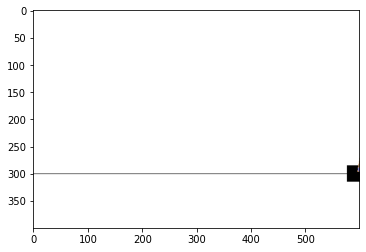

In [4]:
import gym
env = gym.make('CartPole-v1')

scores = train(env, 10000, 0.000045, 0.98, True)

Streaming output truncated to the last 5000 lines.
Episode [5000]: Score [500.0]
Episode [5001]: Score [193.0]
Episode [5002]: Score [370.0]
Episode [5003]: Score [191.0]
Episode [5004]: Score [390.0]
Episode [5005]: Score [500.0]
Episode [5006]: Score [167.0]
Episode [5007]: Score [500.0]
Episode [5008]: Score [500.0]
Episode [5009]: Score [367.0]
Episode [5010]: Score [500.0]
Episode [5011]: Score [428.0]
Episode [5012]: Score [500.0]
Episode [5013]: Score [402.0]
Episode [5014]: Score [500.0]
Episode [5015]: Score [500.0]
Episode [5016]: Score [405.0]
Episode [5017]: Score [500.0]
Episode [5018]: Score [500.0]
Episode [5019]: Score [399.0]
Episode [5020]: Score [500.0]
Episode [5021]: Score [385.0]
Episode [5022]: Score [500.0]
Episode [5023]: Score [500.0]
Episode [5024]: Score [500.0]
Episode [5025]: Score [322.0]
Episode [5026]: Score [500.0]
Episode [5027]: Score [236.0]
Episode [5028]: Score [500.0]
Episode [5029]: Score [500.0]
Episode [5030]: Score [500.0]
Episode [5031]: Sco

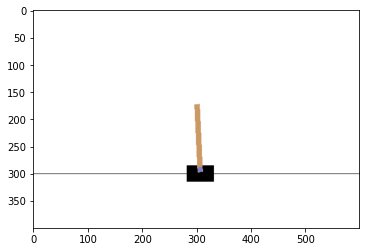

In [10]:
import gym
env = gym.make('CartPole-v1')

scores = train(env, 10000, 0.000045, 0.98, True)

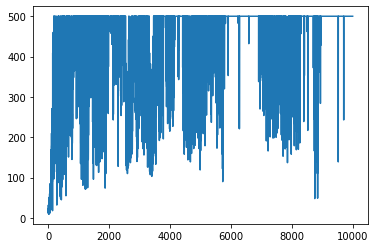

In [11]:
env.close()
plt.plot(np.arange(len(scores)), scores)
plt.show()

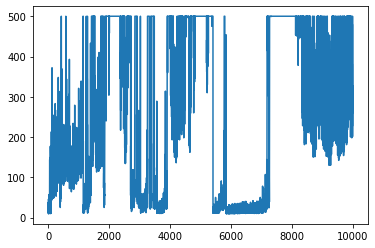

In [6]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(scores)), scores)
plt.show()

In [ ]:
frames = []
for i in range(3):
    obs = env.reset()
    done = False
    R = 0
    t = 0
    while not done and t < 200:
        frames.append(env.render(mode = 'rgb_array'))
        obs, r, done, _ = env.step(env.action_space.sample())
        R += r
        t += 1
    print('test episode:', i, 'R:', R)
 
env.render()

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())